# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов 
   
**Тариф «Смарт»**   
1. Ежемесячная плата: 550 рублей   
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
3. Стоимость услуг сверх тарифного пакета:   
 - минута разговора: 3 рубля   
 - сообщение: 3 рубля   
 - 1 Гб интернет-трафика: 200 рублей   
   
**Тариф «Ультра»**   
1. Ежемесячная плата: 1950 рублей   
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
3. Стоимость услуг сверх тарифного пакета:   
 - минута разговора: 1 рубль   
 - сообщение: 1 рубль   
 - 1 Гб интернет-трафика: 150 рублей   
    
**Примечание**    
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

## Описание данных    
    
Таблица `users` (информация о пользователях):    
- *user_id* — уникальный идентификатор пользователя   
- *first_name* — имя пользователя   
- *last_name* — фамилия пользователя  
- *age* — возраст пользователя (годы)   
- *reg_date* — дата подключения тарифа (день, месяц, год)  
- *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
- *city* — город проживания пользователя  
- *tariff* — название тарифного плана     
  
Таблица `calls` (информация о звонках):   
- *id* — уникальный номер звонка  
- *call_date* — дата звонка  
- *duration* — длительность звонка в минутах  
- *user_id* — идентификатор пользователя, сделавшего звонок  
  
Таблица `messages` (информация о сообщениях):  
- *id* — уникальный номер сообщения  
- *message_date* — дата сообщения  
- *user_id* — идентификатор пользователя, отправившего сообщение  
  
Таблица `internet` (информация об интернет-сессиях):  
- *id* — уникальный номер сессии   
- *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)  
- *session_date* — дата интернет-сессии  
- *user_id* — идентификатор пользователя  
  
Таблица `tariffs` (информация о тарифах):  
- *tariff_name* — название тарифа  
- *rub_monthly_fee* — ежемесячная абонентская плата в рублях  
- *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату  
- *messages_included* — количество сообщений в месяц, включённых в абонентскую плату  
- *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
- *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
- *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета  
- *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

## Изучение данных из файла 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
calls = pd.read_csv('/Users/polina_lunyova/Documents/It/projects/final_version/4_Статистический_анализ_данных/calls.csv')
internet = pd.read_csv('/Users/polina_lunyova/Documents/It/projects/final_version/4_Статистический_анализ_данных/internet.csv')
messages = pd.read_csv('/Users/polina_lunyova/Documents/It/projects/final_version/4_Статистический_анализ_данных/messages.csv')
tariffs = pd.read_csv('/Users/polina_lunyova/Documents/It/projects/final_version/4_Статистический_анализ_данных/tariffs.csv')
users = pd.read_csv('/Users/polina_lunyova/Documents/It/projects/final_version/4_Статистический_анализ_данных/users.csv')
display(calls.head())
display(internet.head())
display(messages.head())
display(tariffs.head())
display(users.head())
display(calls.describe())
display(internet.describe())
display(messages.describe())
display(tariffs.describe())
display(users.describe())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


**Вывод**

В таблицах есть небольшое количество необработанных данных, которые нужно исправить. Также нужно посмотреть на их тип и наличие пропущенных значений.

## Предобработка данных

In [3]:
# определяем пропущенные значения
display(calls.isna().sum())
display(internet.isna().sum())
display(messages.isna().sum())
display(tariffs.isna().sum())
display(users.isna().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

id              0
message_date    0
user_id         0
dtype: int64

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

**Вывод**

Обнаружены пропуски только в дате прекращения пользования тарифом "churn_date". Значение пропущено т.к. тариф ещё действовал на момент выгрузки данных, поэтому исправлять эти пропуски мы не будем.

In [4]:
# определяем тип данных 
display(calls.info())
display(internet.info())
display(messages.info())
display(tariffs.info())
display(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

In [5]:
# округляем данные с помощью "np.ceil()"
calls['duration'] = np.ceil(calls['duration']).astype('int')

# переименовываем тариф
tariffs = tariffs.rename(columns={'tariff_name' : "tariff"})

# переводим мегабайты в гигабайты
internet['mb_used'] = internet['mb_used'] / 1024
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

# изменяем типы данных
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['call_date'] = calls['call_date'].astype('datetime64[M]')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['message_date'] = messages['message_date'].astype('datetime64[M]')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet['session_date'] = internet['session_date'].astype('datetime64[M]')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['reg_date'] = users['reg_date'].astype('datetime64[M]')

# создаем столбцы с месяцами
calls['month'] = calls['call_date'].dt.to_period('M')
messages['month'] = messages['message_date'].dt.to_period('M')
internet['month'] = internet['session_date'].dt.to_period('M')
users['month'] = users['reg_date'].dt.to_period('M')


**Вывод**

Округляем данные с помощью метода "np.ceil()". Переименовываем колонку тарифов ("tariff_name") на ("tariff") для удобства и переводим мегабайты(Мб) в гигабайты(Гб). Если абонент использует 1025 Мб в этом месяце, то с него возьмут плату за 2 Гб.   
Далее были исправлены типы данных в датах звонков ("call_date"), датах сообщений ("message_date") и в датах инернет-сессии ("session_date"), а также были созданы столбцы с месяцами в этих данных. 

## Расчёты и добавление результатов в таблицу

In [6]:
# построим свободные таблицы по пользователю (user_id) и месяцу (month)
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'duration':'sum', 'id':'count'})\
                  .reset_index()
                  
user_messages = messages.groupby(['user_id', 'month'])\
                        .agg({'id':'count'})\
                        .reset_index()

user_internet = internet.groupby(['user_id', 'month'])\
                        .agg({'mb_used':'sum'})\
                        .reset_index()
# объединим свободные таблицы с помощью merge
df_merge = user_calls.merge(user_messages, on=['user_id', 'month'], how='outer')
df_merge = df_merge.merge(user_internet, on=['user_id', 'month'], how='outer')
df_merge = df_merge.merge(users, on='user_id', how='left')
df_merge = df_merge.merge(tariffs, on='tariff', how='left')

# переименуем столбццы 
df_merge = df_merge.rename(columns={'id_x'  : "calls_count", 'mb_used': "gb_used", 'id_y': "messages_count", 'duration': "calls_sum"})

# делаем срез по тарифам 
df_merge_smart = df_merge.query('tariff  == "smart"')
df_merge_ultra = df_merge.query('tariff  == "ultra"')
display(df_merge.head())

,user_id,month_x,calls_sum,calls_count,messages_count,gb_used,age,churn_date,city,first_name,...,reg_date,tariff,month_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05,159.0,22.0,22.0,4.0,52,NaN,Краснодар,Рафаил,...,2018-05-01,ultra,2018-05,1000,30720,3000,1950,150,1,1
1,1000,2018-06,172.0,43.0,60.0,49.0,52,NaN,Краснодар,Рафаил,...,2018-05-01,ultra,2018-05,1000,30720,3000,1950,150,1,1
2,1000,2018-07,340.0,47.0,75.0,28.0,52,NaN,Краснодар,Рафаил,...,2018-05-01,ultra,2018-05,1000,30720,3000,1950,150,1,1
3,1000,2018-08,408.0,52.0,81.0,27.0,52,NaN,Краснодар,Рафаил,...,2018-05-01,ultra,2018-05,1000,30720,3000,1950,150,1,1
4,1000,2018-09,466.0,58.0,57.0,26.0,52,NaN,Краснодар,Рафаил,...,2018-05-01,ultra,2018-05,1000,30720,3000,1950,150,1,1


**Вывод**

Были построены и обьеденины свободные таблицы по пользователю (user_id) и месяцу (month), также сделан срез по тарифам.


In [7]:
df_merge.shape

(3214, 21)

In [8]:
df_merge.user_id.nunique()

498

При присоединении таблиц были утеряны 2 клиента, скорее всего у каких-то пользователей просто не было использованных услуг и они ушли в отток. Такое количество потери данных не критично, поэтому можем продолжать дальнейшее исследование.

In [9]:
# переводим мегабайти в гигабайты объёма интернет-трафика, включённого в абонентскую плату 
df_merge['gb_per_month_included'] = df_merge['mb_per_month_included'] / 1024
df_merge['gb_per_month_included'] = np.ceil(df_merge['gb_per_month_included']).astype('int')

# считаем перерасход по каждой услуги
df_merge['minutes_overrun']  = df_merge['calls_sum'] - df_merge['minutes_included']
df_merge['messages_overrun'] = df_merge['messages_count'] - df_merge['messages_included']
df_merge['gb_used_overrun']  = df_merge['gb_used'] - df_merge['gb_per_month_included'] 

# считаем выручку исходя из тарифа и потребляемых услуг
def get_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_mb = 0
    if row['minutes_overrun'] > 0:
        revenue_by_min = row['minutes_overrun'] * row['rub_per_minute'] 
    if row['messages_overrun'] >0:
        revenue_by_min = row['messages_overrun'] * row['rub_per_message']
    if row['gb_used_overrun'] > 0:
        revenue_by_min = row['gb_used_overrun'] * row['rub_per_gb']          
    return revenue_by_min + revenue_by_messages + revenue_mb 
df_merge['revenue'] = df_merge.apply(get_revenue, axis=1) 

# добавляем абонентскую плату 
df_merge['revenue'] = df_merge['revenue'] + df_merge['rub_monthly_fee']
df_merge.head()

,user_id,month_x,calls_sum,calls_count,messages_count,gb_used,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,minutes_overrun,messages_overrun,gb_used_overrun,revenue
0,1000,2018-05,159.0,22.0,22.0,4.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,30,-2841.0,-978.0,-26.0,1950.0
1,1000,2018-06,172.0,43.0,60.0,49.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,30,-2828.0,-940.0,19.0,4800.0
2,1000,2018-07,340.0,47.0,75.0,28.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,30,-2660.0,-925.0,-2.0,1950.0
3,1000,2018-08,408.0,52.0,81.0,27.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,30,-2592.0,-919.0,-3.0,1950.0
4,1000,2018-09,466.0,58.0,57.0,26.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,30,-2534.0,-943.0,-4.0,1950.0


In [10]:
df_merge['revenue'].describe()

count     3214.000000
mean      5412.380523
std       2841.603450
min        550.000000
25%       2962.500000
50%       5350.000000
75%       7350.000000
max      17750.000000
Name: revenue, dtype: float64

**Вывод**

Было посчитано количество сделанных звонков и израсходованных минут разговора по месяцам (minutes_overrun), количество отправленных сообщений (messages_overrun) и объем израсходованного интернет-трафика (mb_used_overrun). Также посчитана помесячная выручка с каждого пользователя (revenue).

## Исследовательский анализ данных


In [20]:
# подсчет стоимости тарифа в месяц для каждого пользователя 
for index in df_merge['tariff']:
    if index == 'ultra':
        df_merge['calls_upper'] = df_merge['calls_sum'] - 3000
        df_merge['messages_upper'] = df_merge['messages_count'] - 1000
        df_merge['net_upper'] = df_merge['gb_used'] - 30
    elif index == 'smart':
        df_merge['calls_upper'] = df_merge['calls_sum'] - 500
        df_merge['messages_upper'] = df_merge['messages_count'] - 50
        df_merge['net_upper'] = df_merge['gb_used'] - 15
        
df_merge.loc[(df_merge['calls_upper']<0), 'calls_upper'] = 0
df_merge.loc[(df_merge['messages_upper']<0), 'messages_upper'] = 0
df_merge.loc[(df_merge['net_upper']<0), 'net_upper'] = 0
 
df_merge['calls_upper'] = df_merge['calls_upper'].astype('Int64')
df_merge['messages_upper'] = df_merge['messages_upper'].astype('Int64')
df_merge['net_upper'] = df_merge['net_upper'].astype('Int64')
df_merge.head()

,user_id,month_x,calls_sum,calls_count,messages_count,gb_used,age,churn_date,city,first_name,...,rub_per_message,rub_per_minute,gb_per_month_included,minutes_overrun,messages_overrun,gb_used_overrun,revenue,calls_upper,messages_upper,net_upper
0,1000,2018-05,159.0,22.0,22.0,4.0,52,NaN,Краснодар,Рафаил,...,1,1,30,-2841.0,-978.0,-26.0,1950.0,0,0,0
1,1000,2018-06,172.0,43.0,60.0,49.0,52,NaN,Краснодар,Рафаил,...,1,1,30,-2828.0,-940.0,19.0,4800.0,0,0,19
2,1000,2018-07,340.0,47.0,75.0,28.0,52,NaN,Краснодар,Рафаил,...,1,1,30,-2660.0,-925.0,-2.0,1950.0,0,0,0
3,1000,2018-08,408.0,52.0,81.0,27.0,52,NaN,Краснодар,Рафаил,...,1,1,30,-2592.0,-919.0,-3.0,1950.0,0,0,0
4,1000,2018-09,466.0,58.0,57.0,26.0,52,NaN,Краснодар,Рафаил,...,1,1,30,-2534.0,-943.0,-4.0,1950.0,0,0,0


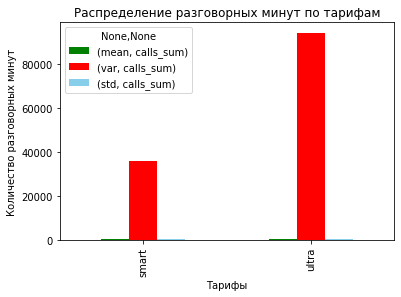

,Среднее количество,Дисперсия,Стандартное отклонение
tariff,,,
smart,419.0,35844.0,189.0
ultra,545.0,94203.0,307.0


In [12]:
# счистем среднее количество разговорных минут, дисперсию и стандартное отклонение для двух тарифов
def calls_mean_var_std(df_merge):
    result = df_merge.pivot_table(index='tariff',
                                  values='calls_sum',
                                  aggfunc=['mean', 'var', 'std'])
    result.plot(kind='bar', color=['green', 'red', 'skyblue'], label=['Среднее количество','Дисперсия', 'Стандартное отклонение'])
    plt.title('Распределение разговорных минут по тарифам')
    plt.xlabel('Тарифы')
    plt.ylabel('Количество разговорных минут')
    plt.show()
    return result

calls_return = calls_mean_var_std(df_merge).round()
calls_return.columns=['Среднее количество','Дисперсия', 'Стандартное отклонение']
display(calls_return)

Произведен подсчет среднего количества разговрных минут, дисперсии и стандартного отклонения. При сравнении двух тарифов "smart" и "ultra", было выявлено, что пользователи использующие тариф "ultra" в среднем тратят больше количесва разговорных минут, чем пользователи тарифа "smart", но своего лимита они не превышают (лимит тарифа "Ульра"- 3000 минут разговора; лимит тарифа "Смарт"- 500 минут разговора).

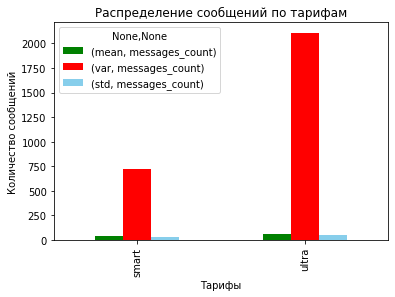

,Среднее количество,Дисперсия,Стандартное отклонение
tariff,,,
smart,39.0,718.0,27.0
ultra,61.0,2110.0,46.0


In [13]:
# счистем среднее количество, дисперсию и стандартное отклонение сообщений для двух тарифов
def return_mean_var_std(df_merge):
    result = df_merge.pivot_table(index='tariff',
                                  values='messages_count',
                                  aggfunc=['mean', 'var', 'std'])
    result.plot(kind='bar', color=['green', 'red', 'skyblue'], label=['Среднее количество сообщений','Дисперсия сообщений', 'Стандартное отклонение сообщений'])
    plt.title('Распределение сообщений по тарифам')
    plt.xlabel('Тарифы')
    plt.ylabel('Количество сообщений')
    plt.show()
    return result

messages_return = return_mean_var_std(df_merge).round()
messages_return.columns=['Среднее количество','Дисперсия', 'Стандартное отклонение']
display(messages_return)

Произведен подсчет среднего количества, дисперсии и стандартного отклонения сообщений. При сравнении двух тарифов "smart" и "ultra", было выявлено, что пользователи использующие тариф "ultra" в среднем отправляют больше сообщений, чем пользователи тарифа "smart", но это очень мальнькая доля от имеющихся 1000 сообщений этого тарифа. Пользователи тарифа "smart" наоборот в среднем практически израсходуют имеющиеся 50 сообщений.

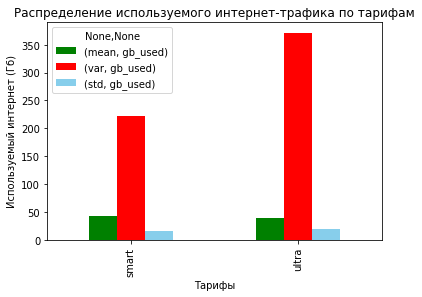

,Среднее количество,Дисперсия,Стандартное отклонение
tariff,,,
smart,42.0,223.0,15.0
ultra,39.0,372.0,19.0


In [14]:
# счистем среднее количество, дисперсию и стандартное отклонение используемого интернет-трафика для двух тарифов
def gb_mean_var_std(df_merge):
    result = df_merge.pivot_table(index='tariff',
                                  values='gb_used',
                                  aggfunc=['mean', 'var', 'std'])
    result.plot(kind='bar', color=['green', 'red', 'skyblue'], label=['Среднее количество','Дисперсия', 'Стандартное отклонение'])
    plt.title('Распределение используемого интернет-трафика по тарифам')
    plt.xlabel('Тарифы')
    plt.ylabel('Используемый интернет (Гб)')
    plt.show()
    return result

gb_return = gb_mean_var_std(df_merge).round()
gb_return.columns=['Среднее количество','Дисперсия', 'Стандартное отклонение']
display(gb_return)

При сравнении тарифов, было выявлено, что пользователи пользующиеся тарифом "ultra" используют больше интернет-трафика, чем пользователи тарифа "smart". 

**Вывод**

Был произведен подсчет стоимости тарифа в месяц для каждого пользователя. Исходя из тарифа были посчитаны минуты разговора, количество сообщений и объем интернет-трафика для каждого пользователя.  
По вычесленным данным и построенным гистрограммам видно, что пользователи тарифа "ultra" используют больше разговорных минут, сообщений и интернет-трафика, чем пользователи тарифа "smart", но не превышают своего трафика. Пользователи тарифа "smart" в среднем наоборот практически израсходуют весть тариф, поэтому вероятность того, что они возьмут дополнительные услуги больше.

## Проверка гипотез

Нулевая гипотеза (H₀) – это гипотеза, в которой мы утверждаем, что не существует никаких отношений или различий между двумя наблюдаемыми событиями. Нулевая гипотеза считается верной, пока нельзя доказать обратное.

Альтернативная гипотеза - это утверждение, которое принимается верным, если отбрасывается H₀.
   
Проверим первую гепотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» равна", следовательно альтернативная – выборка 1 и выборка 2 отличаются.

In [15]:
# срез пользователей по тарифам
users_smart = df_merge.query('tariff  == "smart"')  
users_ultra = df_merge.query('tariff  == "ultra"')

In [16]:
# проверка дисперсии выборок
users_smart_var = users_smart['revenue'].var(ddof=1).round()
print('Дисперсия тарифа "Смарт" равна:', users_smart_var)

users_ultra_var = users_ultra['revenue'].var(ddof=1).round()
print('Дисперсия тарифа "Ультра" равна:', users_ultra_var)

Дисперсия тарифа "Смарт" равна: 8005027.0
Дисперсия тарифа "Ультра" равна: 4692159.0


Дисперсия в тарифах не равна, поэтому при проверке гипотезы в значении 'equal_var' ставим 'False'.

In [17]:
# проверка гипотезы о равности средняей выручки пользователей тарифов
revenue_smart = users_smart['revenue']
revenue_ultra = users_ultra['revenue']

alpha = 0.5

results = st.ttest_ind(revenue_smart, revenue_ultra, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print()
print('Количество пользователей тарифа "Смарт":', users_smart['user_id'].count())
print('Средняя выручка в месяц с пользователя тарифа "Смарт":', users_smart['revenue'].mean().round())
print('Количество пользователей тарифа "Ультра":', users_ultra['user_id'].count())
print('Средняя выручка в месяц с пользователя тарифа "Ультра":', users_ultra['revenue'].mean().round())


p-значение: 1.3176433112302523e-120
Отвергаем нулевую гипотезу

Количество пользователей тарифа "Смарт": 2229
Средняя выручка в месяц с пользователя тарифа "Смарт": 6105.0
Количество пользователей тарифа "Ультра": 985
Средняя выручка в месяц с пользователя тарифа "Ультра": 3844.0


С помощью гипотезы о равенстве средних двух генеральных совокупностей мы проверили, различается ли средняя выручка пользователей тарифов «ultra» и «smart».
Проверка отвергла гипотезу о равенстве средней выручки.


Проверка второй гепотезы "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

In [18]:
# срез пользователей из Москвы и других регионов
from_moscow = df_merge.query('city == "Москва"')
from_regions = df_merge.query('city != "Москва"') 

# проверка дисперсии выборок
from_moscow_var = from_moscow['revenue'].var(ddof=1).round()
print('Дисперсия выборки пользователей из Москвы равна:', users_smart_var)
from_regions_var = from_regions['revenue'].var(ddof=1).round()
print('Дисперсия выборки пользователей из регионов равна:', users_smart_var)

Дисперсия выборки пользователей из Москвы равна: 8005027.0
Дисперсия выборки пользователей из регионов равна: 8005027.0


Дисперсии выборок оказались равными, поэтому в при проверке гипотезы в значении 'equal_var' ставим 'True'.

In [19]:
# проверка гипотезы о равности средняей выручки пользователей из Москвы и других регионов
revenue_moscow = from_moscow['revenue']
revenue_regions = from_regions['revenue']

alpha = 0.5

results = st.ttest_ind(revenue_moscow, revenue_regions, equal_var=True)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print()
print('Количество пользователей из Москвы:', from_moscow['user_id'].count())
print('Средняя выручка в месяц с пользователя из Москвы:', from_moscow['revenue'].mean().round())
print('Количество пользователей из регионов:', from_regions['user_id'].count())
print('Средняя выручка в месяц с пользователя из регионов:', from_regions['revenue'].mean().round())

p-значение: 0.3453090514830658
Отвергаем нулевую гипотезу

Количество пользователей из Москвы: 611
Средняя выручка в месяц с пользователя из Москвы: 5315.0
Количество пользователей из регионов: 2603
Средняя выручка в месяц с пользователя из регионов: 5435.0


Вторая гипотеза тоже была отвергнута. Выручка пользователей из Москвы и регионов оказалась равнозначной.

## Общий вывод

В ходе работы произведен подсчет стоимости тарифа в месяц для каждого пользователя. Исходя из тарифа были посчитаны минуты разговора, количество сообщений и объем интернет-трафика для каждого пользователя.  

 По вычесленным данным и построенным гистрограммам видно, что пользователи тарифа "ultra" используют больше разговорных минут, сообщений и интернет-трафика, чем пользователи тарифа "smart", но не превышают своего трафика. Пользователи тарифа "smart" в среднем наоборот практически израсходуют весть тариф, поэтому вероятность того, что они возьмут дополнительные услуги больше.

Также были проверены две гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Первая гипотеза была отвергнута.** Средняя выручка в месяц с пользователя тарифа "Смарт" оказалась больше другого тарифа. Скорее всего это из-за того, что пользователей этого тарифа больше и дополнительные услуги выше по стоимсти.   
**Вторая гипотеза тоже была отвергнута.** Выручка пользователей из Москвы и регионов оказалась равнозначной.